In [1]:
import tweepy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

consumer_key = "E94DFtes8j5myDibhj4sfs0NA"
consumer_secret = "f02atPbdvNHpaOyo5CzfKKDQidqY3JPdSDxTVEuL9Oi220RaZh"
access_token = "358155084-9hyegtGt2qSXTw3OYa5vOdR27Zx9BECK40Z1QWay"
access_token_secret = "qh8kdCttP4ciVAdYMU70NQmw9oFzapA6f5U3OCtgTg9W3"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [2]:
search_words = "covid"
date_since = "2020-07-23"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
        q=new_search,
        lang="id",
        since=date_since).items(10)

In [3]:
items = []
for tweet in tweets:
    item = []
    item.append (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet.text).split()))
    items.append(item)
hasil = pd.DataFrame(data=items, columns=['tweet'])

In [4]:
pos_list= open("D:/TELKOM UNIVERSITY/Course IT/SANBERCODE/DATA SCIENCE LANJUTAN/WEEK 2/kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("D:/TELKOM UNIVERSITY/Course IT/SANBERCODE/DATA SCIENCE LANJUTAN/WEEK 2/kata_negatif.txt","r")
neg_kata = neg_list.readlines()

# count_p = 0
# count_n = 0
# for item in items:
    
#     for kata_pos in pos_kata:
#         if kata_pos.strip() in item[0]:
#             count_p +=1
#     for kata_neg in neg_kata:
#         if kata_neg.strip() in item[0]:
#             count_n +=1
# print ("positif: "+str(count_p))
# print ("negatif: "+str(count_n))


for item in items:
    count_p = 0
    count_n = 0
    for kata_pos in pos_kata:
        if kata_pos.strip() in item[0]:
            count_p +=1
    for kata_neg in neg_kata:
        if kata_neg.strip() in item[0]:
            count_n +=1
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))

positif: 2
negatif: 3
positif: 0
negatif: 1
positif: 0
negatif: 0
positif: 1
negatif: 0
positif: 0
negatif: 0
positif: 0
negatif: 2
positif: 1
negatif: 1
positif: 0
negatif: 1
positif: 1
negatif: 0
positif: 3
negatif: 0


In [5]:
totCount = count_p - count_n
totCount

# Total Nilai > 0, maka sentimen positif
# Total Nilai < 0, maka sentimen negatif
# Total Nilai = 0, maka sentimen netral

3

In [6]:
S = []
for item in items:
        count_p = 0
        count_n = 0
        for kata_pos in pos_kata:
            if kata_pos.strip() in item[0]:
                count_p +=1
        for kata_neg in neg_kata:
            if kata_neg.strip() in item[0]:
                count_n +=1
        S.append(count_p - count_n)
    
hasil["value"] = S
print ("Nilai rata-rata: "+str(np.mean(hasil["value"])))
print ("Standar deviasi: "+str(np.std(hasil["value"])))

Nilai rata-rata: 0.0
Standar deviasi: 1.3416407864998738


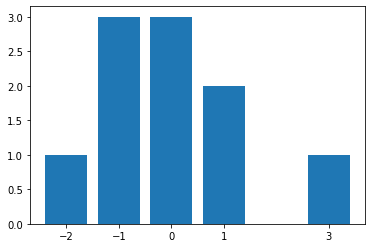

In [7]:
labels, counts = np.unique(hasil["value"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [8]:
hasil

,tweet,value
0,Memang PR saya yang belum selesai soal jembata...,-1
1,I bet tikamatenga chikho madzulowa mawa mankhw...,-1
2,hello brpa minggu sudah nada kes baru Covid 19...,0
3,Upaya Pencegahan penyebaran Virus Corona Covid...,1
4,Studi Mobilitas Kantor Rumah dan Risiko COVID ...,0
5,Kudu sedih apa piye nek misal keluargamu nyepe...,-2
6,BerinovasiUntukIndonesia sertaa menjangkau pan...,0
7,Pelaksanaan Sholat Idul Adha 1441 H dan penyem...,-1
8,Pelajar hingga anggota Polri di Batam positif ...,1
9,Salah satu sejawat yg sangat islami pejuang co...,3
